In [1]:
import time
from datetime import date
import pandas as pd
import os
import glob
import pycytominer
import sys
import CBE_utils as CBE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.spatial.distance import correlation
import re
import gc

In [2]:
import importlib
importlib.reload(CBE)

<module 'CBE_utils' from '/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py'>

In [3]:
# For test
input_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_output/"
output_path = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_results/"

annotation_dir = "/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/test_annotation/"

In [4]:
# get folder list 
# load for each site the normalized files
# reduce the features selecting the correct feature list
folders = [name for name in os.listdir(input_path) if os.path.isdir(os.path.join(input_path, name))]

In [5]:
pattern = "[A-Z][0-9][0-9][0-9][0-9]_R[1-4]_mad_robustize_reduced-corr.csv"

FMP_Data = []
IMTM_Data = []
MEDINA_Data = []
USC_Data = []

for folder in folders:

    site_specific_path = os.path.join(input_path, folder)

    # load normalized data
    file_list = glob.glob(site_specific_path + os.sep + '*' + os.sep + pattern, recursive=True)

    for file in file_list:

        filename = os.path.basename(file)
    
        try:
        
            Data_Temp = pd.read_csv(file)
            row_count = Data_Temp.shape[0]
        
            print(f"File: {filename} has {row_count} rows")
        
            if folder == 'FMP':
                
                FMP_Data.append(Data_Temp)

            elif folder == 'IMTM':

                IMTM_Data.append(Data_Temp)

            elif folder == 'MEDINA':

                MEDINA_Data.append(Data_Temp)

            elif folder == 'USC':

                USC_Data.append(Data_Temp)
            
        except Exception as e:
        
            print(f"Error reading file {filename}: {e}")
        
        


File: B1007_R3_mad_robustize_reduced-corr.csv has 381 rows
File: B1002_R1_mad_robustize_reduced-corr.csv has 382 rows
File: B1002_R2_mad_robustize_reduced-corr.csv has 384 rows
File: B1003_R4_mad_robustize_reduced-corr.csv has 384 rows
File: B1002_R3_mad_robustize_reduced-corr.csv has 382 rows
File: B1004_R1_mad_robustize_reduced-corr.csv has 379 rows
File: B1003_R2_mad_robustize_reduced-corr.csv has 383 rows
File: B1003_R3_mad_robustize_reduced-corr.csv has 382 rows
File: B1006_R3_mad_robustize_reduced-corr.csv has 381 rows
File: B1002_R4_mad_robustize_reduced-corr.csv has 383 rows
File: B1001_R2_mad_robustize_reduced-corr.csv has 379 rows
File: B1004_R3_mad_robustize_reduced-corr.csv has 381 rows
File: B1001_R4_mad_robustize_reduced-corr.csv has 383 rows
File: B1004_R4_mad_robustize_reduced-corr.csv has 378 rows
File: B1004_R2_mad_robustize_reduced-corr.csv has 380 rows
File: B1007_R2_mad_robustize_reduced-corr.csv has 381 rows
File: B1007_R1_mad_robustize_reduced-corr.csv has 380 ro

In [6]:
### concat all files together
FMP_Data_aggregated = pd.concat(FMP_Data)
FMP_Data_aggregated = FMP_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", FMP_Data_aggregated.shape)

Aggregated Data has shape  (10697, 671)


In [7]:
IMTM_Data_aggregated = pd.concat(IMTM_Data)
IMTM_Data_aggregated = IMTM_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", IMTM_Data_aggregated.shape)

Aggregated Data has shape  (10668, 647)


In [8]:
MEDINA_Data_aggregated = pd.concat(MEDINA_Data)
MEDINA_Data_aggregated = MEDINA_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", MEDINA_Data_aggregated.shape)

Aggregated Data has shape  (10735, 592)


In [9]:
USC_Data_aggregated = pd.concat(USC_Data)
USC_Data_aggregated = USC_Data_aggregated.reset_index(drop = True)
print("Aggregated Data has shape ", USC_Data_aggregated.shape)

Aggregated Data has shape  (10747, 644)


# Assign to specific source

In [55]:
Data_aggregated = USC_Data_aggregated

In [56]:
Data_aggregated.head()

,Metadata_imaging_date,Metadata_imaging_time,Metadata_staining_date,Metadata_user,Metadata_Object_Count,Metadata_Well,Metadata_RoughID,Metadata_Plate,Metadata_replicate_number,Metadata_instrument,...,Cyto_Texture_InfoMeas1_ER_3_02_256,Cyto_Texture_InfoMeas1_ER_5_00_256,Cyto_Texture_InfoMeas1_ER_5_03_256,Cyto_Texture_InfoMeas1_Mito_3_00_256,Cyto_Texture_InfoMeas2_AGP_5_02_256,Cyto_Texture_InfoMeas2_DNA_3_01_256,Cyto_Texture_InfoMeas2_ER_5_01_256,Cyto_Texture_InverseDifferenceMoment_ER_10_03_256,Cyto_Texture_SumAverage_ER_10_02_256,Cyto_Texture_SumVariance_ER_5_01_256
0,230930,NaN,230930,NaN,112,A01,EOS_cpd,B1007R3,R3,NaN,...,2.988872,-0.102568,3.046967,0.323185,-2.170970,-0.105945,-0.716570,1.055266,-1.905520,-0.404630
1,230930,NaN,230930,NaN,1571,A02,EOS_cpd,B1007R3,R3,NaN,...,-3.754375,-0.557482,-0.383341,-0.547896,0.677284,0.145551,0.124732,0.719852,-0.565935,-0.883908
2,230930,NaN,230930,NaN,1674,A03,EOS_cpd,B1007R3,R3,NaN,...,0.853394,2.014789,1.130370,1.001018,0.283486,0.289135,-0.824118,1.378009,-0.382856,-1.310027
3,230930,NaN,230930,NaN,1536,A04,EOS_cpd,B1007R3,R3,NaN,...,-2.605960,-0.214992,0.135085,-0.783383,0.514667,0.349135,-0.371514,0.730113,-0.362212,-0.966333
4,230930,NaN,230930,NaN,1688,A05,EOS_cpd,B1007R3,R3,NaN,...,-0.583065,0.066729,0.466892,-0.516511,0.075859,0.360582,-0.753444,1.086386,-0.191451,-1.261862


# Paper Version

In [57]:
# Filter for plates with four replicates

replicate_list = Data_aggregated['Metadata_plate_map_name'].unique()
replicate_dataframe = pd.DataFrame(replicate_list, columns=['Metadata_plate_map_name']) 

replicate_list_newcolumns = replicate_dataframe['Metadata_plate_map_name'].str.split('_', n=1, expand=True)
replicate_dataframe['Metadata_plate_name'] = replicate_list_newcolumns[0]
replicate_dataframe['Metadata_replicate_number'] = replicate_list_newcolumns[1]

replicate_counts = replicate_dataframe.groupby('Metadata_plate_name')['Metadata_replicate_number'].count().reset_index()

replicate_counts 

,Metadata_plate_name,Metadata_replicate_number
0,B1001,4
1,B1002,4
2,B1003,4
3,B1004,4
4,B1005,4
5,B1006,4
6,B1007,4


In [58]:
# Group by 'measurement_code' and filter groups that have exactly the specified number of replicates
filtered_replicate_dataframe= replicate_dataframe.groupby('Metadata_plate_name').filter(lambda x: len(x['Metadata_replicate_number']) == 4)
filtered_replicate_dataframe = filtered_replicate_dataframe.sort_values(by=['Metadata_plate_name'])

Data_aggregated_filtered = Data_aggregated[Data_aggregated['Metadata_plate_map_name'].isin(filtered_replicate_dataframe['Metadata_plate_map_name'])]

In [59]:
Data_aggregated_filtered.head()
print(Data_aggregated_filtered['Metadata_source'].unique())
print(Data_aggregated_filtered['Metadata_plate_name'].unique())

['USC']
['B1007' 'B1006' 'B1003' 'B1001' 'B1002' 'B1004' 'B1005']


## Toxicity filter

Toxic conditions removed with threshold 480.19
Old shape (10747, 644)
New shape (10382, 644)


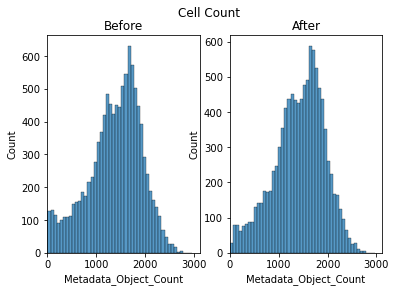

In [60]:
HepG2_Reduced_Tox, HepG2_Reduced_Tox_Cond = CBE.remove_tox(
    Data_aggregated_filtered, 
    key_col = ["Metadata_EOS", "Metadata_plate_name"], 
    SD_Threshold = 2.5,  
    plot_distribution = True)

In [61]:
len(HepG2_Reduced_Tox["Metadata_EOS"].unique())

2375

## Raw %Replication

In [62]:
HepG2_replicating, HepG2_corr_replicating_df = CBE.remove_non_reproducible(
    HepG2_Reduced_Tox, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  63.5 |
Nonreplicating conditions removed with threshold 0.44
Old shape (10382, 644)
New shape (6924, 644)


/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py:391: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


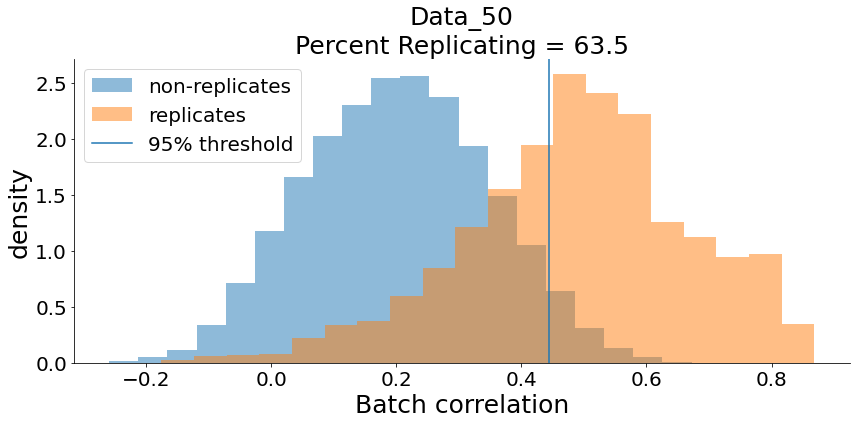

In [63]:
n_experiments = len(HepG2_corr_replicating_df)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(HepG2_corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(HepG2_corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{HepG2_corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {HepG2_corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(output_path + os.sep + Data_aggregated_filtered['Metadata_source'][0] + os.sep + str(date.today()) + "_Percent_Replicating.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)

## Activity filter

In [64]:
## gets feature vector
Features_HepG2_Norm_Reduced = CBE.get_feature_vector(HepG2_Reduced_Tox)

HepG2_Norm_Reduced_Median = pycytominer.consensus(
        profiles = HepG2_Reduced_Tox, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_EOS", "Metadata_plate_name", "Metadata_source"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_HepG2_Norm_Reduced, # (str, list) – The features to collapse, defaults to “infer”
)

In [65]:
len(HepG2_Norm_Reduced_Median["Metadata_EOS"].unique())

2375

In [66]:
key_col = ["Metadata_EOS", "Metadata_plate_name", "Metadata_source"]

HepG2_active, HepG2_low_active = CBE.remove_low_active(HepG2_Norm_Reduced_Median, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("HepG2 active:", len(HepG2_active["Metadata_EOS"].unique()))
print("HepG2 low-active:", len(HepG2_low_active["Metadata_EOS"].unique()))

HepG2 active: 592
HepG2 low-active: 1783


In [67]:
HepG2_Reduced_Tox_active = HepG2_Reduced_Tox[
    (HepG2_Reduced_Tox["Metadata_EOS"].isin(HepG2_active["Metadata_EOS"]))]

# Active %Replication

In [68]:
HepG2_active_replicating, HepG2_active_corr_replicating_df = CBE.remove_non_reproducible(
    HepG2_Reduced_Tox_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                  95.3 |
Nonreplicating conditions removed with threshold 0.42
Old shape (2471, 644)
New shape (2360, 644)


/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py:391: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


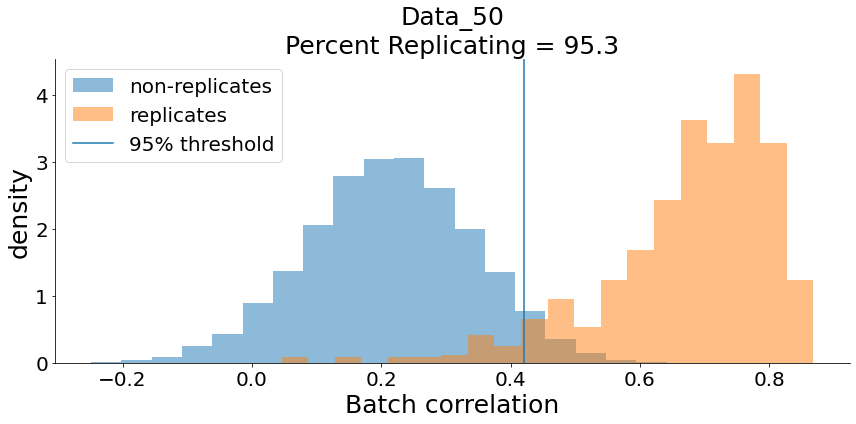

In [69]:
# plot % replicating
corr_replicating_df = HepG2_active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

plt.savefig(output_path + os.sep + Data_aggregated_filtered['Metadata_source'][0] + os.sep + str(date.today()) + "_Percent_Replicating_Induction_Filter.pdf", 
            transparent=False, 
            bbox_inches='tight', 
            dpi = 600)# 

# Failed version

In [36]:
# Gets the feature and metadata columns
features_columns = CBE.get_feature_vector(Data_aggregated)
metadata_columns = set(Data_aggregated.columns) - set(features_columns)

columns_to_drop = [
    'Metadata_imaging_date',
    'Metadata_staining_date',
    'Metadata_imaging_time',
    'Metadata_Plate',
    'Metadata_plate_name',
    'Metadata_replicate_number',
    'Metadata_source',
    'Metadata_user',
    'Metadata_RoughID']

In [37]:
replicate_list = Data_aggregated['Metadata_plate_map_name'].unique()
replicate_dataframe = pd.DataFrame(replicate_list, columns=['Metadata_plate_map_name']) 

replicate_list_newcolumns = replicate_dataframe['Metadata_plate_map_name'].str.split('_', n=1, expand=True)
replicate_dataframe['Metadata_plate_name'] = replicate_list_newcolumns[0]
replicate_dataframe['Metadata_replicate_number'] = replicate_list_newcolumns[1]

replicate_counts = replicate_dataframe.groupby('Metadata_plate_name')['Metadata_replicate_number'].count().reset_index()

replicate_counts 

In [39]:
# Group by 'measurement_code' and filter groups that have exactly the specified number of replicates
filtered_replicate_dataframe= replicate_dataframe.groupby('Metadata_plate_name').filter(lambda x: len(x['Metadata_replicate_number']) == 4)
filtered_replicate_dataframe = filtered_replicate_dataframe.sort_values(by=['Metadata_plate_name'])

Data_aggregated_filtered = Data_aggregated[Data_aggregated['Metadata_plate_map_name'].isin(filtered_replicate_dataframe['Metadata_plate_map_name'])]

In [40]:
Data_aggregated_filtered.head()
print(Data_aggregated_filtered['Metadata_source'].unique())
print(Data_aggregated_filtered['Metadata_plate_name'].unique())

['IMTM']
['B1001']


In [41]:
Data_aggregated_filtered

,Metadata_imaging_time,Metadata_staining_date,Metadata_EOS,Metadata_Batch,Metadata_replicate_number,Metadata_Object_Count,Metadata_instrument,Metadata_imaging_date,Metadata_plate_name,Metadata_picklist_name,...,Cyto_Texture_InverseDifferenceMoment_ER_10_00_256,Cyto_Texture_InverseDifferenceMoment_ER_10_01_256,Cyto_Texture_InverseDifferenceMoment_ER_10_02_256,Cyto_Texture_InverseDifferenceMoment_ER_10_03_256,Cyto_Texture_InverseDifferenceMoment_ER_5_00_256,Cyto_Texture_InverseDifferenceMoment_ER_5_01_256,Cyto_Texture_InverseDifferenceMoment_ER_5_03_256,Cyto_Texture_InverseDifferenceMoment_Mito_10_03_256,Cyto_Texture_SumEntropy_ER_10_03_256,Cyto_Texture_SumEntropy_ER_5_02_256
0,NaN,230717,EOS100001,HepG2_10uM,R3,1253,NaN,230717,B1001,IMTM_Replicate3.csv,...,0.565757,0.590582,0.791168,0.529929,0.348738,0.613425,0.740611,-0.847826,-0.837958,-0.553536
1,NaN,230717,EOS100089,HepG2_10uM,R3,227,NaN,230717,B1001,IMTM_Replicate3.csv,...,2.641204,1.846769,2.120493,2.328056,2.631983,1.921904,3.051349,1.844089,-0.469869,-1.506438
2,NaN,230717,EOS100009,HepG2_10uM,R3,1267,NaN,230717,B1001,IMTM_Replicate3.csv,...,-0.540182,-0.177775,-0.182800,-0.156492,-0.703745,-0.470591,-0.221443,-0.640599,0.325172,0.242333
3,NaN,230717,EOS100097,HepG2_10uM,R3,1198,NaN,230717,B1001,IMTM_Replicate3.csv,...,0.514475,0.536755,0.395773,0.413626,0.639283,0.523025,0.671827,0.736665,-0.509650,-0.331855
4,NaN,230717,EOS100017,HepG2_10uM,R3,771,NaN,230717,B1001,IMTM_Replicate3.csv,...,-1.642108,-1.151146,-1.556361,-1.704161,-1.762997,-1.257937,-1.479845,-0.999220,2.051050,1.905850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10663,NaN,230712,EOS100344,HepG2_10uM,R1,336,NaN,230712,B1001,IMTM_Replicate1.csv,...,0.114660,1.376203,0.899241,2.010396,-0.681893,-0.036679,-0.103805,-1.628948,1.551100,-0.013491
10664,NaN,230712,EOS100264,HepG2_10uM,R1,1391,NaN,230712,B1001,IMTM_Replicate1.csv,...,-1.765010,-1.712711,-1.747858,-1.867608,-2.292900,-1.555748,-2.080134,-1.635071,2.529054,2.844995
10665,NaN,230712,EOS100352,HepG2_10uM,R1,1539,NaN,230712,B1001,IMTM_Replicate1.csv,...,-1.818353,-1.948860,-2.051701,-2.242589,-2.303801,-2.282990,-1.941184,0.690539,0.654632,1.244592
10666,NaN,230712,DMSO,HepG2_10uM,R1,1683,NaN,230712,B1001,IMTM_Replicate1.csv,...,-2.034461,-1.184319,-2.397019,-2.162756,-2.179068,-1.636650,-1.491443,2.007802,1.980502,2.035826


# Identify plates with NaN features

In [14]:
rows_with_nan = Data_aggregated_filtered.isna().any(axis=1)
num_rows_with_nan = rows_with_nan.sum()
print(num_rows_with_nan)

10668


In [15]:
len(Data_aggregated_filtered)

10668

# PLates with full replication set

In [16]:
# cleans up weird index columns that seem to pop up. Maybe need to investigate
# Data_aggregated_filtered = Data_aggregated_filtered.drop(["index"], axis=1)

In [19]:
columns = Data_aggregated_filtered.columns
for col in columns:
    print(col)

Metadata_imaging_time
Metadata_staining_date
Metadata_EOS
Metadata_Batch
Metadata_replicate_number
Metadata_Object_Count
Metadata_instrument
Metadata_imaging_date
Metadata_plate_name
Metadata_picklist_name
Metadata_imaging_timezone
Metadata_plate_map_name
Metadata_user
Metadata_Well
Metadata_source
Metadata_RoughID
Metadata_Plate
Nuc_AreaShape_BoundingBoxMinimum_X
Nuc_AreaShape_Eccentricity
Nuc_AreaShape_Extent
Nuc_AreaShape_FormFactor
Nuc_AreaShape_MajorAxisLength
Nuc_AreaShape_Orientation
Nuc_AreaShape_Zernike_0_0
Nuc_AreaShape_Zernike_1_1
Nuc_AreaShape_Zernike_3_3
Nuc_AreaShape_Zernike_4_0
Nuc_AreaShape_Zernike_4_2
Nuc_AreaShape_Zernike_5_1
Nuc_AreaShape_Zernike_5_3
Nuc_AreaShape_Zernike_5_5
Nuc_AreaShape_Zernike_6_0
Nuc_AreaShape_Zernike_6_2
Nuc_AreaShape_Zernike_6_4
Nuc_AreaShape_Zernike_6_6
Nuc_AreaShape_Zernike_7_1
Nuc_AreaShape_Zernike_7_3
Nuc_AreaShape_Zernike_7_5
Nuc_AreaShape_Zernike_8_4
Nuc_AreaShape_Zernike_8_6
Nuc_AreaShape_Zernike_8_8
Nuc_AreaShape_Zernike_9_1
Nuc_AreaSh

In [20]:
## gets feature vector
Features_filtered_feature_select = CBE.get_feature_vector(Data_aggregated_filtered)
Features_filtered_feature_select.append("Metadata_Object_Count") 

median_filtered_feature_select = pycytominer.consensus(
        profiles = Data_aggregated_filtered, # A file or pandas DataFrame of profile data
        replicate_columns = ["Metadata_source", 
                             "Metadata_RoughID_unique",
                             "Metadata_plate_name",
                             "Metadata_Well"], # Metadata columns indicating which replicates to collapse, defaults to [“Metadata_Plate”, “Metadata_Well”]
        operation = "median", # (str) – The method used to form consensus profiles, defaults to “median”
        features = Features_filtered_feature_select, # (str, list) – The features to collapse, defaults to “infer”
)

# Toxicity analysis

In [21]:
def pad_numbers(value):
    match = re.match(r"([A-Z])(\d+)", value)
    if match:
        letter = match.group(1)
        number = match.group(2).zfill(2)  # Pad number to 2 digits
        return f"{letter}{number}"
    return value

In [22]:
## 2.5 Std from population median
# TODO: problematic tox threshold does not work currently
# Now set to 1.5 STDs from sample median
# Works well on larger samples...???
SD_Threshold = 1.5

tox_threshold_1 = median_filtered_feature_select["Metadata_Object_Count"].median() - (SD_Threshold * Data_aggregated_filtered["Metadata_Object_Count"].std())
print("Tox threshold:", tox_threshold_1)

FMP_Toxic_conditions_1 = Data_aggregated_filtered.loc[Data_aggregated_filtered["Metadata_Object_Count"] < tox_threshold_1]
print("Toxic conditions: " + str(len(FMP_Toxic_conditions_1 )) + " compounds (" + str(SD_Threshold) + " Std from population median)")

Tox threshold: 751.2589156142551
Toxic conditions: 1149 compounds (1.5 Std from population median)


# Raw % replication

In [23]:
print(Data_aggregated.columns.tolist())

['Metadata_imaging_time', 'Metadata_staining_date', 'Metadata_EOS', 'Metadata_Batch', 'Metadata_replicate_number', 'Metadata_Object_Count', 'Metadata_instrument', 'Metadata_imaging_date', 'Metadata_plate_name', 'Metadata_picklist_name', 'Metadata_imaging_timezone', 'Metadata_plate_map_name', 'Metadata_user', 'Metadata_Well', 'Metadata_source', 'Metadata_RoughID', 'Metadata_Plate', 'Nuc_AreaShape_BoundingBoxMinimum_X', 'Nuc_AreaShape_Eccentricity', 'Nuc_AreaShape_Extent', 'Nuc_AreaShape_FormFactor', 'Nuc_AreaShape_MajorAxisLength', 'Nuc_AreaShape_Orientation', 'Nuc_AreaShape_Zernike_0_0', 'Nuc_AreaShape_Zernike_1_1', 'Nuc_AreaShape_Zernike_3_3', 'Nuc_AreaShape_Zernike_4_0', 'Nuc_AreaShape_Zernike_4_2', 'Nuc_AreaShape_Zernike_5_1', 'Nuc_AreaShape_Zernike_5_3', 'Nuc_AreaShape_Zernike_5_5', 'Nuc_AreaShape_Zernike_6_0', 'Nuc_AreaShape_Zernike_6_2', 'Nuc_AreaShape_Zernike_6_4', 'Nuc_AreaShape_Zernike_6_6', 'Nuc_AreaShape_Zernike_7_1', 'Nuc_AreaShape_Zernike_7_3', 'Nuc_AreaShape_Zernike_7_5',

In [24]:
Data_aggregated['Metadata_EOS']

0        EOS100001
1        EOS100089
2        EOS100009
3        EOS100097
4        EOS100017
           ...    
10663    EOS100344
10664    EOS100264
10665    EOS100352
10666         DMSO
10667         DMSO
Name: Metadata_EOS, Length: 10668, dtype: object

In [25]:
replicating_source, corr_replicating_source = CBE.remove_non_reproducible(
    Data_aggregated, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_EOS", 
    description = "IMTM")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| IMTM          |                     9 |
Nonreplicating conditions removed with threshold 0.28
Old shape (10668, 647)
New shape (1730, 647)


/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py:391: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


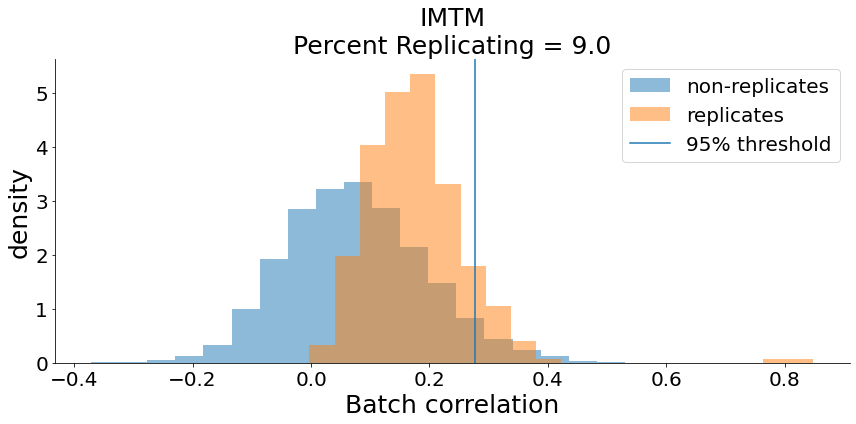

In [26]:
n_experiments = len(corr_replicating_source)

plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_source.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_source.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_source.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_source.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_source.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()

plt.tight_layout()

# plt.savefig(figure_path + str(date.today()) + "_HepG2_Percent_Replicating.pdf", 
#            transparent=False, 
#            bbox_inches='tight', 
#            dpi = 600)

In [27]:
## gets feature vector
Features_median_filtered_source_feature_select = CBE.get_feature_vector(median_filtered_feature_select)

len(median_filtered_feature_select["Metadata_RoughID_unique"].unique())

355

In [43]:
def remove_non_active(df: pd.DataFrame, 
                      key_col, 
                      feature_activity_threshold=3.0, 
                      induction_threshold=5):
    """
    removes compounds via induction threshold
    :param df: consensus, feature selected CellProfiler Profiles
    :param key_col = ["Metadata_EOS", "Metadata_Plate", "Metadata_Concentration"]
    :param feature_activity_threshold: z-score where feature is considered active
    :param induction_threshold: % of active features where compound passes threshold
    :return: new DataFrame with active compounds, new DataFrame with non active compounds
    """
    # removes key columns
    feature_df = df.drop(columns=key_col)
 
    # percent of features equal or higher than activity threshold
    induction = (feature_df >= feature_activity_threshold).sum(axis=1) / len(feature_df.columns) * 100

    # treatments with induction equal or higher than induction threshold
    Data_active = df[(induction >= induction_threshold)]
    
    # treatments with induction lower than induction threshold
    Data_non_active = df[(induction < induction_threshold)]
    
    return Data_active, Data_non_active

In [29]:
key_col = ["Metadata_source", "Metadata_RoughID_unique", "Metadata_plate_name", "Metadata_Well"]

active, non_active = remove_non_active(median_filtered_feature_select, 
                                                   key_col,
                                                   3.0, 
                                                   5.0)

print("Active:", len(active["Metadata_RoughID_unique"].unique()))
print("Non-active:", len(non_active["Metadata_RoughID_unique"].unique()))

Active: 2
Non-active: 353


In [30]:
non_active_EOS = pd.DataFrame(non_active["Metadata_RoughID_unique"].unique(), columns = ["Metadata_RoughID_unique"])

In [31]:
Reduced_active = Data_aggregated_filtered[
    (Data_aggregated_filtered['Metadata_RoughID_unique'].isin(active['Metadata_RoughID_unique']))]

# Compute metrics over replicates

In [32]:
active_replicating, active_corr_replicating_df = CBE.remove_non_reproducible(
    Reduced_active, 
    n_samples = 10000, 
    n_replicates = 4, 
    ID_col = "Metadata_Well", 
    description = "Data_50")

| Description   |   Percent_Replicating |
|:--------------|----------------------:|
| Data_50       |                   100 |
Nonreplicating conditions removed with threshold 0.19
No conditions below threshold
Old shape (112, 648)
New shape (112, 648)


/home/schmiedc/FMP_Docs/Projects/ECBL_Project/QualityControl_analysis_revision/notebooks_revision/CBE_utils.py:391: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  corr_replicating_df = corr_replicating_df.append({'Description': description,


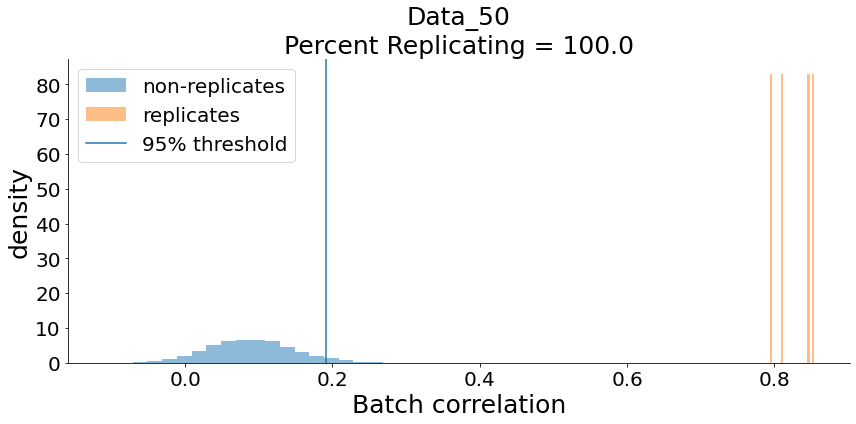

In [33]:
# plot % replicating
corr_replicating_df = active_corr_replicating_df

n_experiments = len(corr_replicating_df)


plt.rcParams['figure.facecolor'] = 'white' # Enabling this makes the figure axes and labels visible in PyCharm Dracula theme
plt.figure(figsize=[12, n_experiments*6])

for i in range(n_experiments):
    plt.subplot(n_experiments, 1, i+1)
    plt.hist(corr_replicating_df.loc[i,'Null_Replicating'], label='non-replicates', density=True, bins=20, alpha=0.5)
    plt.hist(corr_replicating_df.loc[i,'Replicating'], label='replicates', density=True, bins=20, alpha=0.5)
    plt.axvline(corr_replicating_df.loc[i,'Value_95'], label='95% threshold')
    plt.legend(fontsize=20)
    plt.title(
        f"{corr_replicating_df.loc[i,'Description']}\n" +
        f"Percent Replicating = {corr_replicating_df.loc[i,'Percent_Replicating']}",
        fontsize=25
    )
    plt.ylabel("density", fontsize=25)
    plt.xlabel("Batch correlation", fontsize=25)
    plt.xticks(fontsize=20)
    plt.yticks(fontsize=20)
    sns.despine()
plt.tight_layout()

# plt.savefig(figure_path + str(date.today()) + "_HepG2_Percent_Replicating_Induction_Filter.pdf", 
            #transparent=False, 
            #bbox_inches='tight', 
            #dpi = 600)# 